In [102]:
from tensorflow.keras import layers, utils, models, datasets
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [103]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [104]:
training_images, testing_images = training_images/255, testing_images/255

In [105]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

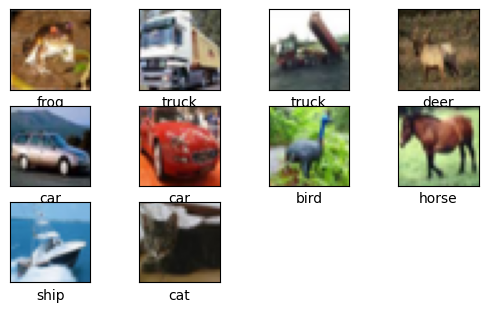

In [106]:
for i in range(10):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [107]:
model = models.Sequential()

# Input layer to just let this model know what should the input shape be like
model.add(layers.Input(shape=(32,32,3)))

In [108]:
# Creating Layers for our ML
# Including Conv2D to simplify images, and for ML to find key characteristics of each class
# MaxPooling2D to ???
# Using relu activation method commonly
# And at the end changing it to softmax for it to give out which one is the most probable answer out of 10 classes

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))


# Flatten to output single values
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [109]:
# Using less data from dataset to speed up the process a bit
# By taking only first some amount of data for training and testing

training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [110]:
# Compiling for the model to know which loss function to use to further decrease the losses
# Mainly focusing on increasing the accuracy of the model
# Using mean square error loss function just for testing (outputs an error)
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [111]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.2652 - loss: 1.9649
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4769 - loss: 1.4475
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5328 - loss: 1.2862
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.5752 - loss: 1.1824
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6199 - loss: 1.0838
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.6515 - loss: 0.9890
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.6724 - loss: 0.9320
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.6976 - loss: 0.8622
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.7245 - loss: 0.7838
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.7461 - loss: 0.7195


In [112]:
model.save('model.keras')

In [113]:
loss, accuracy = model.evaluate(testing_images, testing_labels)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6119 - loss: 1.1802


In [114]:
loss,accuracy

(1.1732935905456543, 0.6184999942779541)

In [114]:
# Low accuracy due to lot of classes to classify to